### Kalman Filter

* [Section 1: Stock price](#section1)
* [Section 2: A moving object](#section2)

### Section 1: Stock price

In [1]:
#! pip install yfinance
#! pip install pykalman
import yfinance as yf
data = yf.download("SPY", start="2017-01-01", end="2021-12-31")

[*********************100%***********************]  1 of 1 completed


In [2]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,208.213501,91366500
2017-01-04,225.619995,226.750000,225.610001,226.580002,209.452240,78744400
2017-01-05,226.270004,226.580002,225.479996,226.399994,209.285812,78379000
2017-01-06,226.529999,227.750000,225.899994,227.210007,210.034561,71559900
2017-01-09,226.910004,227.070007,226.419998,226.460007,209.341278,46939700


In [3]:
X = data['Adj Close']
X

Date
2017-01-03    208.213501
2017-01-04    209.452240
2017-01-05    209.285812
2017-01-06    210.034561
2017-01-09    209.341278
                 ...    
2021-05-14    416.579987
2021-05-17    415.519989
2021-05-18    411.940002
2021-05-19    410.859985
2021-05-20    415.279999
Name: Adj Close, Length: 1103, dtype: float64

In [4]:
from pykalman import KalmanFilter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Construct a Kalman filter
kf = KalmanFilter(transition_matrices = [1],    # The value for At. It is a random walk so is set to 1.0
                  observation_matrices = [1],   # The value for Ht.
                  initial_state_mean = 0,       # Any initial value. It will converge to the true state value.
                  initial_state_covariance = 1, # Sigma value for the Qt in Equation (1) the Gaussian distribution
                  observation_covariance=1,     # Sigma value for the Rt in Equation (2) the Gaussian distribution
                  transition_covariance=.01)    # A small turbulence in the random walk parameter 1.0
# Get the Kalman smoothing
state_means, _ = kf.filter(data['Adj Close'].values)
state_means

array([[104.10675049],
       [139.68701515],
       [157.64501644],
       ...,
       [413.86745592],
       [413.58137052],
       [413.7429524 ]])

In [5]:
data['KF_mean'] = np.array(state_means)
data.head()

,Open,High,Low,Close,Adj Close,Volume,KF_mean
Date,,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,208.213501,91366500,104.106750
2017-01-04,225.619995,226.750000,225.610001,226.580002,209.452240,78744400,139.687015
2017-01-05,226.270004,226.580002,225.479996,226.399994,209.285812,78379000,157.645016
2017-01-06,226.529999,227.750000,225.899994,227.210007,210.034561,71559900,168.718593
2017-01-09,226.910004,227.070007,226.419998,226.460007,209.341278,46939700,176.081344


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,KF_mean
Date,,,,,,,
2021-05-14,413.209991,417.489990,413.179993,416.579987,416.579987,82123100,413.917658
2021-05-17,415.390015,416.390015,413.359985,415.519989,415.519989,65129200,414.070079
2021-05-18,415.799988,416.059998,411.769989,411.940002,411.940002,59810200,413.867456
2021-05-19,406.920013,411.049988,405.329987,410.859985,410.859985,106355400,413.581371
2021-05-20,411.799988,416.619995,411.670013,415.279999,415.279999,77360973,413.742952


Text(0, 0.5, 'Price')

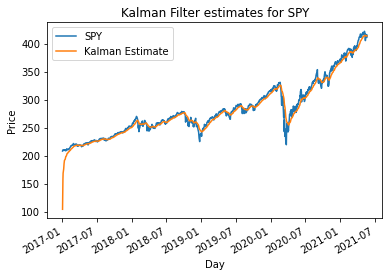

In [7]:
data[['Adj Close','KF_mean']].plot()
plt.title('Kalman Filter estimates for SPY')
plt.legend(['SPY','Kalman Estimate'])
plt.xlabel('Day')
plt.ylabel('Price')

### Section 2: A Moving objective

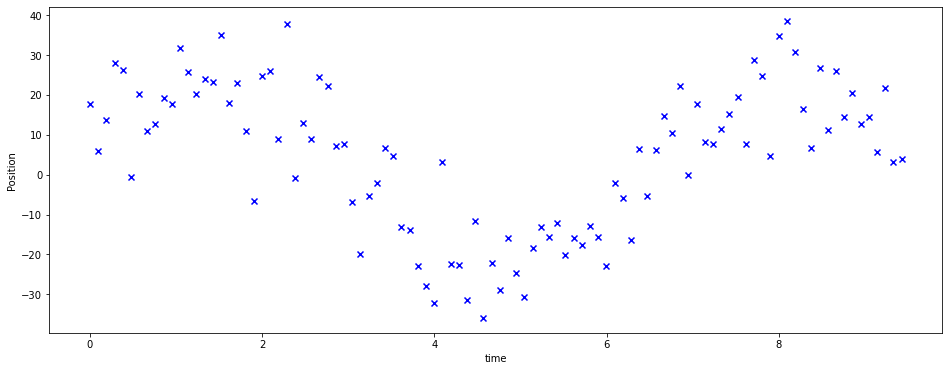

In [63]:
import numpy as np
import pylab as pl
from pykalman import KalmanFilter

rnd = np.random.RandomState(0)
n_timesteps = 100
x = np.linspace(0, 3 * np.pi, n_timesteps)
y = 20 * (np.sin(x) + 0.5 * rnd.randn(n_timesteps))
pl.figure(figsize=(16, 6))
pl.scatter(x,y, marker='x', color='b', label='observations')
pl.xlabel('time')
pl.ylabel('Position')
pl.show()

In [56]:
kf = KalmanFilter(transition_matrices=np.array([[1, 1], [0, 1]]),
                  transition_covariance=0.01 * np.eye(2))
states_pred = kf.em(y).smooth(y)[0]

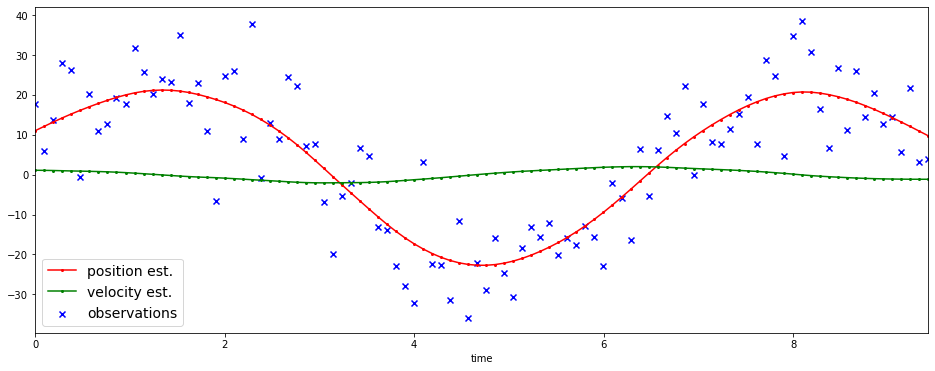

In [57]:
pl.figure(figsize=(16, 6))
obs_scatter = pl.scatter(x, y, marker='x', color='b',
                         label='observations')
position_line = pl.plot(x, states_pred[:, 0],markersize=2,
                        linestyle='-', marker='o', color='r',
                        label='position est.')
velocity_line = pl.plot(x, states_pred[:, 1],markersize=2,
                        linestyle='-', marker='o', color='g',
                        label='velocity est.')
pl.legend(loc='lower left',fontsize=14)
pl.xlim(xmin=0, xmax=x.max())
pl.xlabel('time')
pl.show()

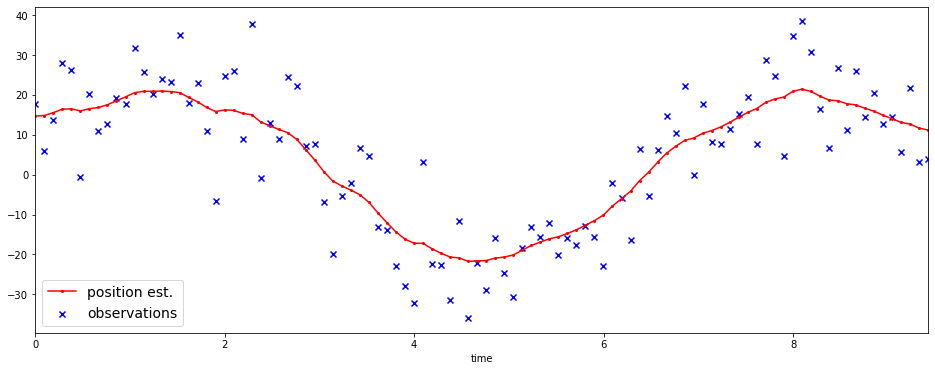

In [34]:
kf = KalmanFilter(transition_matrices=[1],
                  transition_covariance=0.01)
states_pred = kf.em(y).smooth(y)[0]

pl.figure(figsize=(16, 6))
obs_scatter = pl.scatter(x, y, marker='x', color='b',
                         label='observations')
position_line = pl.plot(x, states_pred,markersize=2,
                        linestyle='-', marker='o', color='r',
                        label='position est.')
pl.legend(loc='lower left',fontsize=14)
pl.xlim(xmin=0, xmax=x.max())
pl.xlabel('time')
pl.ylabel('Position')
pl.show()